# Imports

In [1]:
# Install required libraries
!pip install diffusers transformers accelerate
!pip install opencv-python
!pip install controlnet-aux
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.4/282.4 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 require

In [2]:
import cv2
import numpy as np
import torch
from controlnet_aux import OpenposeDetector
import os
from PIL import Image
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Create directories for storing data
os.makedirs("comic_character", exist_ok=True)
os.makedirs("comic_character/character_data", exist_ok=True)
os.makedirs("comic_character/character_poses", exist_ok=True)

print("Folders created: 'character_data' and 'character_poses'")


Folders created: 'character_data' and 'character_poses'


# Set up Git

In [60]:
!git config --global user.name "tklein42"
!git config --global user.email "tmklein101@gmail.com"

In [42]:
!git clone https://github.com/tklein42/comic-character-gen.git

Cloning into 'comic-character-gen'...


In [56]:
!cp -r /content/comic_character/* /content/comic-character-gen/

In [62]:
%cd /content/comic-character-gen/
!git remote set-url origin https://github.com/tklein42/comic-character-gen.git
!git add .
!git commit -m "Add content folder"
!git push origin main

/content/comic-character-gen
On branch main
Your branch is based on 'origin/main', but the upstream is gone.
  (use "git branch --unset-upstream" to fixup)

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
%cd /content/

# Initial Character Generation

In [5]:
from diffusers import StableDiffusionXLPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [6]:
# Load the SDXL model from Hugging Face
model_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = StableDiffusionXLPipeline.from_pretrained(model_id, torch_dtype=torch.bfloat16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
# Character prompt
character = "tall man, dark hair, medium hair length, stubble beard, blue eyes"
prompt = f"a {character} in modern cartoon style, high quality, full body view, legs showing, white t-shirt, blue jeans, standing pose, highly detailed face, colored image"

In [37]:
torch.cuda.empty_cache()

  0%|          | 0/50 [00:00<?, ?it/s]

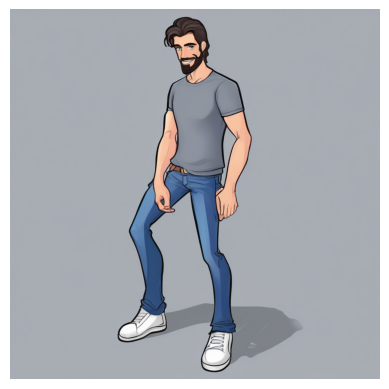

In [9]:
# Initial image generation
image = pipe(prompt=prompt, height=1024, width=1024).images[0]

# Show the image using PIL and Matplotlib
plt.imshow(image)
plt.axis("off")  # Turn off axis for a cleaner look
plt.show()

In [11]:
# Save the reference character
image.save("comic_character/character_data/initial_character.png")

# Additional Pose Creation

In [14]:
from diffusers import StableDiffusionXLControlNetImg2ImgPipeline, ControlNetModel

In [39]:
# Load the ControlNet
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)

# Load the Stable Diffusion XL pipeline with ControlNet
pos_pipe = StableDiffusionXLControlNetImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    controlnet=controlnet,
    torch_dtype=torch.float16
)

pos_pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLControlNetImg2ImgPipeline {
  "_class_name": "StableDiffusionXLControlNetImg2ImgPipeline",
  "_diffusers_version": "0.30.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "requires_aesthetics_score": false,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [48]:
# Load the original character image (reference image)
reference_image = Image.open("comic_character/character_data/initial_character.png")

In [49]:
# Folder where the pose images are located
pose_folder = "comic_character/character_poses"

In [50]:
# List all PNG files (assuming they are named as .png)
pose_files = [f for f in os.listdir(pose_folder) if f.endswith(".png")]

In [44]:
for pose_file in pose_files:
    # Load the pose image
    pose_image = Image.open(os.path.join(pose_folder, pose_file))

    # Resize the pose image to match the reference image size
    resized_pose_image = pose_image.resize(reference_image.size)

    # Save the resized image back to the same folder (overwriting the original)
    resized_pose_image.save(os.path.join(pose_folder, pose_file))


In [51]:
pose_prompt = f"a {character} in modern cartoon style, high quality, full body view, legs showing, t-shirt, blue jeans, highly detailed face, colored image, plain background, one man, good anatomy, maintain the original face and body structure from reference image"

In [52]:
# Load an OpenPose PNG image (pose file)
pose_image = Image.open("comic_character/character_poses/tpose_02.png")

In [54]:
print(reference_image.size)
print(pose_image.size)

(1024, 1024)
(1024, 1024)


In [55]:
# Generate the new image using the image-to-image pipeline with ControlNet
result = pos_pipe(
    prompt=pose_prompt,
    image=reference_image,     # Reference character image
    control_image=pose_image,  # Pose image (OpenPose)
    strength=0.8,              # Strength controls how much the reference image is altered
    guidance_scale=7.5,        # Controls how much the model follows the prompt vs. the reference image
    height=1024,                # Adjust resolution as needed
    width=1024
)

# Extract and display the newly generated character image with the applied pose
new_character_image = result.images[0]

# Display the result
plt.imshow(new_character_image)
plt.axis("off")
plt.show()


  0%|          | 0/40 [00:00<?, ?it/s]

RuntimeError: mat1 and mat2 shapes cannot be multiplied (154x2048 and 768x320)

In [35]:
# Loop through all pose images and generate a character image for each
for i, pose_file in enumerate(pose_files):
    # Load the current pose image
    pose_image = Image.open(os.path.join(pose_folder, pose_file))

    # Generate the new image using the image-to-image pipeline with ControlNet
    result = pos_pipe(
        prompt=pose_prompt,
        image=reference_image,     # Reference character image
        control_image=pose_image,  # Pose image (OpenPose)
        strength=0.8,              # Adjust how much the reference image influences the output
        guidance_scale=7.5,        # Control how much the model follows the prompt
        height=1024,                # Adjust resolution as needed
        width=1024
    )

    # Extract the generated image
    new_character_image = result.images[0]

    # Save the result using a unique filename
    output_filename = f"comic_character/character_data/character_with_pose_{i+1}.png"
    new_character_image.save(output_filename)

    print(f"Generated image for pose {i+1}: {pose_file}")

    # Optionally, display each generated image (you can comment this out if it's too slow)
    plt.imshow(new_character_image)
    plt.axis("off")
    plt.show()

KeyboardInterrupt: 

# Fine-tuning Character